# Problem - 1

### The following dataset contains patient ID, follow up, event type, and scenarios. Build a survival analysis model on the given data.

In [1]:
#importing required libraries
import numpy as np
import pandas as pd

In [2]:
#reading the data into  python
patient = pd.read_csv(r"D:\360 Data Science 360DigiTMG\Day38-Survival Analytics\Datasets_Survival Analytics\Patient.csv")
patient

,PatientID,Followup,Eventtype,Scenario
0,John,1.0,1,A
1,Jess,2.0,1,A
2,Ann,3.0,0,A
3,Mary,4.0,0,A
4,Frank,5.0,1,A
5,Steven,6.0,1,A
6,Andy,6.2,1,A
7,Elizabeth,8.0,0,A
8,Joe,9.0,1,A
9,Kate,10.0,0,A


In [3]:
#eda or statistical analysis
patient.describe()

,Followup,Eventtype
count,10.000000,10.000000
mean,5.420000,0.600000
std,2.993994,0.516398
min,1.000000,0.000000
25%,3.250000,0.000000
50%,5.500000,1.000000
75%,7.550000,1.000000
max,10.000000,1.000000


In [4]:
#columns of the data
patient.columns

Index(['PatientID', 'Followup', 'Eventtype', 'Scenario'], dtype='object')

In [5]:
patient.Followup.describe()

count    10.000000
mean      5.420000
std       2.993994
min       1.000000
25%       3.250000
50%       5.500000
75%       7.550000
max      10.000000
Name: Followup, dtype: float64

In [6]:
#removing the patient id column
patient = patient.drop(['PatientID'],axis=1)
patient

,Followup,Eventtype,Scenario
0,1.0,1,A
1,2.0,1,A
2,3.0,0,A
3,4.0,0,A
4,5.0,1,A
5,6.0,1,A
6,6.2,1,A
7,8.0,0,A
8,9.0,1,A
9,10.0,0,A


In [7]:
from sklearn import preprocessing

In [8]:
le = preprocessing.LabelEncoder()
patient['Scenario'] = le.fit_transform(patient['Scenario'])

In [9]:
#followup is refering to time
T = patient.Followup

In [10]:
#importing kaplanmeier model to fit the survival analytics
from lifelines import KaplanMeierFitter

In [11]:
kmf = KaplanMeierFitter()

#fit time and event for eventtype
kmf.fit(T,event_observed=patient.Eventtype)

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 10 total observations, 4 right-censored observations>

<AxesSubplot: xlabel='timeline'>

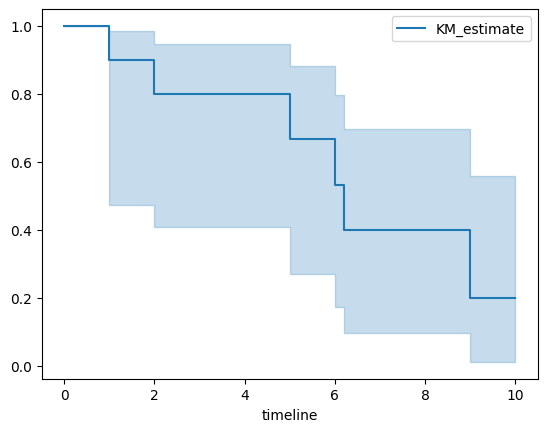

In [12]:
#time line extimation plot
kmf.plot()

In [13]:
#over multiple groups ; for each group here group is scenario
patient.Scenario.value_counts()

0    10
Name: Scenario, dtype: int64

<AxesSubplot: xlabel='timeline'>

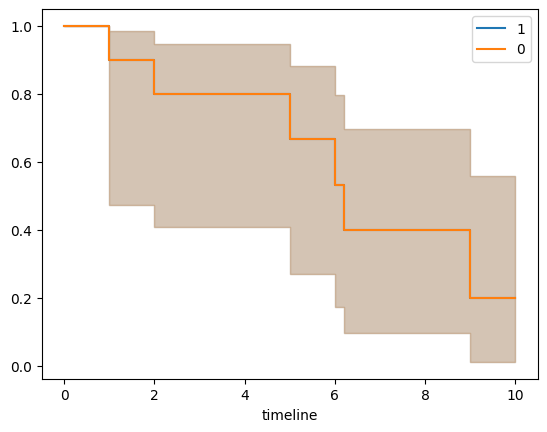

In [21]:
#applying kaplainmeirfitter model on time and event on scenario '1'
kmf.fit(T[patient.Scenario==0], patient.Eventtype[patient.Scenario==0], label=1)
ax=kmf.plot()
#applying kaplainmeirfitter model on time and event on scenario '0'
kmf.fit(T[patient.Scenario==0], patient.Eventtype[patient.Scenario==0], label=0)
kmf.plot(ax=ax)

# Problem - 2

### ECG of different age groups of people has been recorded. The survival time in hours after the operation is given and the event type is denoted by 1 (if dead) and 0 (if alive). Perform survival analysis on the dataset given below and provide your insights in the documentation. 

In [22]:
import pandas as pd

In [25]:
#reading the data into python
ecg = pd.read_excel(r"D:\360 Data Science 360DigiTMG\Day38-Survival Analytics\Datasets_Survival Analytics\ECG_Surv.xlsx")
ecg

,survival_time_hr,alive,age,pericardialeffusion,fractionalshortening,epss,lvdd,wallmotion-score,wallmotion-index,multi_sensor,name,group
0,11.0,0,71,0,0.260,9.000,4.600,14.0,1.000,1.000,name,1
1,19.0,0,72,0,0.380,6.000,4.100,14.0,1.700,0.588,name,1
2,16.0,0,55,0,0.260,4.000,3.420,14.0,1.000,1.000,name,1
3,57.0,0,60,0,0.253,12.062,4.603,16.0,1.450,0.788,name,1
4,19.0,1,57,0,0.160,22.000,5.750,18.0,2.250,0.571,name,1
...,...,...,...,...,...,...,...,...,...,...,...,...
128,7.5,1,64,0,0.240,12.900,4.720,12.0,1.000,0.857,name,3
129,41.0,0,64,0,0.280,5.400,5.470,11.0,1.100,0.714,name,3
130,36.0,0,69,0,0.200,7.000,5.050,14.5,1.210,0.857,name,3
131,22.0,0,57,0,0.140,16.100,4.360,15.0,1.360,0.786,name,3


In [26]:
ecg.describe()

,survival_time_hr,alive,age,pericardialeffusion,fractionalshortening,epss,lvdd,wallmotion-score,wallmotion-index,multi_sensor,group
count,133.000000,133.000000,133.000000,133.000000,133.000000,117.000000,121.000000,128.000000,130.00000,129.000000,133.000000
mean,21.795338,0.383459,62.413534,0.187970,0.228534,12.164769,4.763157,14.438125,1.37800,0.786202,1.984962
std,15.885313,0.488067,9.335601,0.392165,0.135864,7.370159,0.810013,5.018566,0.45185,0.225661,0.590133
min,0.030000,0.000000,23.000000,0.000000,0.010000,0.000000,2.320000,2.000000,1.00000,0.140000,1.000000
25%,6.000000,0.000000,57.000000,0.000000,0.150000,7.000000,4.230000,11.000000,1.00000,0.714000,2.000000
50%,22.000000,0.000000,62.000000,0.000000,0.217000,11.000000,4.650000,14.000000,1.21600,0.786000,2.000000
75%,33.000000,1.000000,68.000000,0.000000,0.280000,16.100000,5.300000,16.500000,1.50750,0.857000,2.000000
max,57.000000,1.000000,86.000000,1.000000,0.840000,40.000000,6.780000,39.000000,3.00000,2.000000,3.000000


In [28]:
#eda
#selecting required columns
ecg =ecg[['survival_time_hr','alive','group']]
ecg

,survival_time_hr,alive,group
0,11.0,0,1
1,19.0,0,1
2,16.0,0,1
3,57.0,0,1
4,19.0,1,1
...,...,...,...
128,7.5,1,3
129,41.0,0,3
130,36.0,0,3
131,22.0,0,3


In [29]:
#survival_time_hr is refering to time
T = ecg.survival_time_hr

In [32]:
#initializing the model
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()

In [33]:
kmf.fit(T, event_observed=ecg.alive )

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 133 total observations, 82 right-censored observations>

<AxesSubplot: xlabel='timeline'>

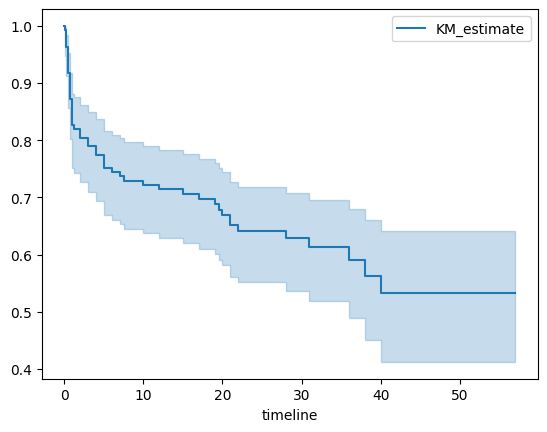

In [34]:
#time line estimation plot
kmf.plot()

In [35]:
# Over Multiple groups # For each group, here group is group
ecg.group.value_counts()

2    87
1    24
3    22
Name: group, dtype: int64

<AxesSubplot: xlabel='timeline'>

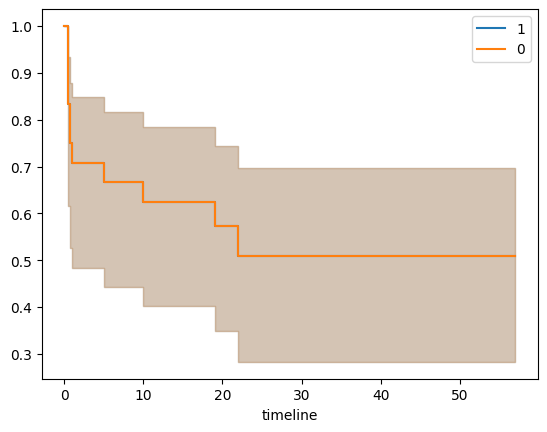

In [41]:
#applying kaplanmeier fitter model in time and event for group 1
kmf.fit(T[ecg.group == 1], ecg.alive[ecg.group == 1],label= 1)
ax = kmf.plot()
#applying kaplanmeier fitter model in time and event for group 0
kmf.fit(T[ecg.group == 1], ecg.alive[ecg.group == 1],label= 0)
kmf.plot(ax=ax)